# CaseStudy 03 - Kelompok B

**Anggota Kelompok B**

| NIM | Nama |
|--------- | --------- |
| 11220940000004 |	Rio Tri Wibowo |
| 11220940000016 |	Muhammad Fahmi Islam |
| 11220940000024 |	Yuliana |
| 11220940000029 |	Muhammad Anthar Jailani Putra |
| 11220940000075 |	Raden Arinal Haque |


# Import Modul

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap

# Loading Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv')
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# Preprocessing

## Menghapus Data Duplikat

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data duplikat sehingga bisa melanjutkan ke langkah selanjutnya.

## Mengecek unik dari variabel dan mengeksekusinya

In [ ]:
# membuat fungsi untuk memeriksa unik pada setiap variabel
def cekdf(df):
  list_kolom = list(df.columns)
  for i in list_kolom:
    print("\n",i)
    print(df[i].unique())

cekdf(df)


 meter_reading
[237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]

 primary_use
['Education' 'Lodging/residential' 'Office'
 'Entertainment/public assembly' 'Other' 'Retail' 'Parking'
 'Public services' 'Warehouse/storage' 'Food sales and service'
 'Religious worship' 'Healthcare' 'Utility' 'Technology/science'
 'Manufacturing/industrial' 'Services']

 square_feet
[ 7432  2720  5376 ... 11265 29775 92271]

 year_built
[2008. 2004. 1991. 2002. 1975. 2000. 1981. 1989. 2003. 2010. 1968. 1999.
 2013. 1974. 1996. 1980. 1977. 1990. 1985. 2001. 1969. 2005. 2016. 2006.
 2014. 1970. 1971. 2011. 1997. 2007. 1998. 2009. 1979. 1986. 1982. 1983.
   nan 1913. 1953. 1909. 1958. 1960. 1976. 1906. 1900. 1995. 1956. 1930.
 1967. 1919. 1955. 1965. 1907. 2012. 1992. 1948. 1950. 1941. 1957. 1964.
 1940. 1951. 1966. 1934. 1959. 1993. 1939. 1918. 1963. 1987. 1914. 1973.
 1988. 1935. 1942. 2015. 1931. 1928. 1929. 1908. 1927. 1923. 1962. 1944.
 1910. 1949. 2017. 1922. 1911. 1

### Menyederhanakan Kolom "primary_use" dengan mengubahnya menjadi beberapa 6 kategori

In [ ]:
replace_dict = {
    'Education': 'Education',
    'Technology/science': 'Education',
    'Lodging/residential': 'Residential',
    'Office': 'Office',
    'Entertainment/public assembly': 'Public assembly',
    'Public services': 'Public services',
    'Services': 'Public services',
    'Food sales and service': 'Public services',
    'Healthcare': 'Public services',
    'Retail': 'Others',
    'Parking': 'Others',
    'Warehouse/storage': 'Others',
    'Utility': 'Others',
    'Religious worship': 'Others',
    'Manufacturing/industrial': 'Others',
    'Other':'Others',
}

df['primary_use'] = df['primary_use'].replace(replace_dict)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


## Missing Values

In [ ]:
# cek mv
df.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


### Melakukan imputasi untuk kolom "year_built", kami mengasumsikan menggunakan modus yang sesuai dengan "primary_use" nya

In [ ]:
modes = df.groupby('primary_use')['year_built'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df['year_built'] = df.apply(
    lambda row: modes[row['primary_use']] if pd.isna(row['year_built']) else row['year_built'],
    axis=1
)

### Menghapus kolom yang dianggap tidak memiliki korelasi terhadap target, kolom yang total NaN nya lebih dari 60%, dan kolom numerik yang bersifat kategorik

In [ ]:
missing_data = df.isnull().sum()  # Jumlah missing value
missing_percentage = (df.isnull().sum() / len(df)) * 100  # Persentase missing value

# Gabungkan hasil ke dalam satu tabel
missing_summary = pd.DataFrame({
    "Jumlah Missing": missing_data,
    "Persentase Missing (%)": missing_percentage
})

# Tampilkan hasil
print(missing_summary)

                    Jumlah Missing  Persentase Missing (%)
meter_reading                    0                0.000000
primary_use                      0                0.000000
square_feet                      0                0.000000
year_built                       0                0.000000
floor_count                   1061               75.088464
air_temperature                  0                0.000000
cloud_coverage                  17                1.203114
dew_temperature                  0                0.000000
precip_depth_1_hr              176               12.455768
sea_level_pressure              89                6.298655
wind_direction                   0                0.000000
wind_speed                       0                0.000000


In [ ]:
# hapus kolom
df1 = df.drop(columns=['floor_count','wind_speed', 'wind_direction','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure'])
df1.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,0
air_temperature,0


# **Visualisasi**

## Melihat persebaran kolom kontinu terhadap variabel target


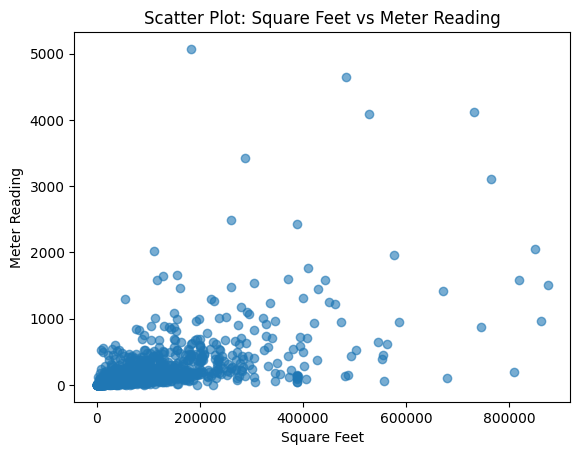

In [ ]:
plt.scatter(df1['square_feet'], df1['meter_reading'], alpha=0.6)
plt.xlabel("Square Feet")
plt.ylabel("Meter Reading")
plt.title("Scatter Plot: Square Feet vs Meter Reading")
plt.show()


Terlihat bahwa persebarannya tidak linear, karena titik-titik datanya mengumpul.

## Melakukan transformasi log kepada "meter_reading" dan "square_feet" agar distribusinya menjadi linear

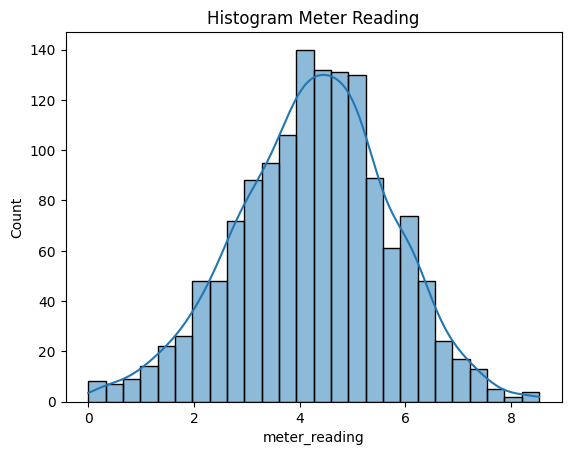

In [ ]:
# variabel 'meter_reading'
import numpy as np
df1['meter_reading'] = np.log1p(df1['meter_reading'])  # Log transform (log(y+1))
sns.histplot(df1['meter_reading'], kde=True)
plt.title('Histogram Meter Reading')
plt.show()

setelah melakukan transformasi log, terlihat linear dari grafik.

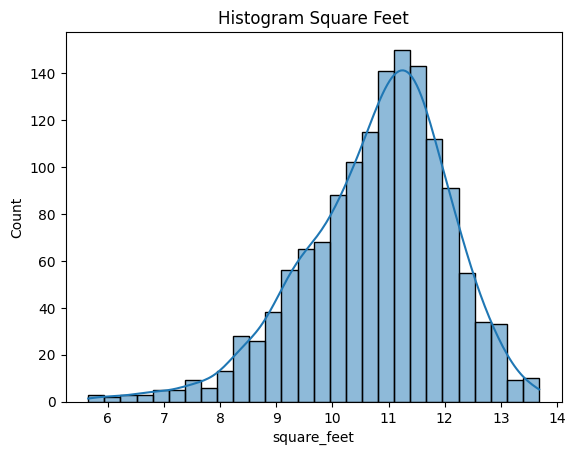

In [ ]:
# variabel 'square_feet'
import numpy as np
df1['square_feet'] = np.log1p(df1['square_feet'])  # Log transform (log(y+1))
sns.histplot(df1['square_feet'], kde=True)
plt.title('Histogram Square Feet')
plt.show()

setelah melakukan transformasi log, terlihat linear dari grafik.

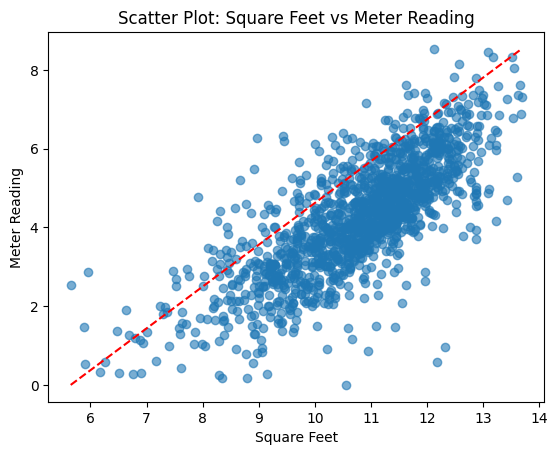

In [ ]:
# dari tranformasi, terlihat persebaran distribusinya

# garis diagonal
x = df1['square_feet']
y = df1['meter_reading']
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

# plot garis diagonal
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--', label="Diagonal Line")


plt.scatter(df1['square_feet'], df1['meter_reading'], alpha=0.6)
plt.xlabel("Square Feet")
plt.ylabel("Meter Reading")
plt.title("Scatter Plot: Square Feet vs Meter Reading")
plt.show()


Dari grafik tersebut, pola penyebaran datanya terlihat mendekati linear karena titik-titik tersebut mengikuti pola garis diagonal, meskipun ada sedikit variasi atau noise di sekitar garis tersebut

# Modelling

## Melakukan Encode terhadap kolom kategorik yaitu "primary_use"

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df1[['primary_use']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['primary_use']))
df_encoded = df1.join(encoded_df).drop(columns=['primary_use'])

## Membagi kolom target menjadi y dan kolom prediktor atau fitur menjadi x dan melakukan split data train dan test untuk pemodelan

In [ ]:
x = df_encoded.drop(columns=['meter_reading'])
y = df_encoded['meter_reading']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modeling XGBoost

In [ ]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Jika Anda melakukan regresi
    'lambda':0,
    'eval_metric': 'rmse',
    'max_depth': 3,
    'learning_rate': 0.1,
    'alpha': 1
}

bst = xgb.train(params, dtrain, num_boost_round=200)

y_pred = bst.predict(dtest)

n = x_test.shape[0]
p = x_test.shape[1]
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Adjusted R2: {adj_r2:.2f}")
print(f"R² (R2 Score): {r2:.2f}")

Mean Absolute Error (MAE): 0.5346878567502773
Mean Squared Error (MSE): 0.50
Root Mean Squared Error (RMSE): 0.71
Adjusted R2: 0.77
R² (R2 Score): 0.78


Dari hasil modeling didapat:
1. **Mean Absolute Error (MAE) 0.53**: Rata-rata selisih antara nilai prediksi dan nilai aktual adalah sekitar 0.53, menunjukkan bahwa model cenderung memiliki kesalahan yang relatif kecil dalam perkiraan.

2. **Mean Squared Error (MSE) 0.50**: Rata-rata kuadrat kesalahan prediksi adalah 0.50. MSE ini sedikit lebih besar daripada MAE karena menghitung kesalahan kuadrat, yang lebih sensitif terhadap kesalahan besar.

3. **Root Mean Squared Error (RMSE) 0.71**: Nilai RMSE ini menunjukkan bahwa rata-rata kesalahan prediksi dalam satuan yang sama dengan data asli adalah 0.71, memberikan gambaran yang lebih jelas tentang seberapa besar deviasi kesalahan model.

4. **Adjusted R² 0.77**: Model ini memiliki nilai Adjusted R² sebesar 0.77, yang berarti sekitar 77% dari variabilitas data dapat dijelaskan oleh model, dengan memperhitungkan kompleksitas model.

5. **R² (R2 Score) 0.78**: Dengan R² sebesar 0.78, model ini menunjukkan bahwa 78% variabilitas data dapat dijelaskan, yang menunjukkan model memiliki kemampuan yang cukup baik dalam memprediksi data.

## Melakukan hyperturning untuk mencari parameter terbaik dari model yang telah dibuat

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'alpha': [0, 0.5, 1],
    'lambda': [0, 0.5, 1, 2]
}

# Variabel untuk menyimpan hasil terbaik
best_rmse = float('inf')
best_params = {}

# Grid search melalui kombinasi parameter
for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for alpha in param_grid['alpha']:
            for lambda_ in param_grid['lambda']:
                # Set parameter untuk model
                params = {
                    'max_depth': max_depth,
                    'learning_rate': learning_rate,
                    'alpha': alpha,
                    'lambda': lambda_,
                    'objective': 'reg:squarederror',
                    'eval_metric': 'rmse'
                }

                # Tentukan num_boost_round secara manual
                num_boost_round = 200  # Atau tentukan berdasarkan preferensi Anda

                # Cross-validation menggunakan xgb.cv()
                cv_results = xgb.cv(
                    params=params,
                    dtrain=dtrain,
                    num_boost_round=num_boost_round,
                    nfold=5,  # 5-fold cross-validation
                    early_stopping_rounds=10,
                    metrics='rmse',
                    as_pandas=True
                )

                # Menyimpan hasil terbaik
                mean_rmse = cv_results['test-rmse-mean'].min()
                if mean_rmse < best_rmse:
                    best_rmse = mean_rmse
                    best_params = params

# Menampilkan hasil parameter terbaik
print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

# Setelah mendapatkan parameter terbaik, latih model dengan parameter terbaik
best_model = xgb.train(params=best_params, dtrain=dtrain, num_boost_round=num_boost_round)

# Prediksi menggunakan model terbaik
y_pred = best_model.predict(dtest)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil metrik
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Adjusted R²: {adj_r2:.2f}")
print(f"R² (R2 Score): {r2:.2f}")

Best Parameters: {'max_depth': 3, 'learning_rate': 0.1, 'alpha': 1, 'lambda': 0, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
Best RMSE: 0.8113083027319276
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.50
Root Mean Squared Error (RMSE): 0.71
Adjusted R²: 0.77
R² (R2 Score): 0.78


# Visualisasi

## Membuat residual plot

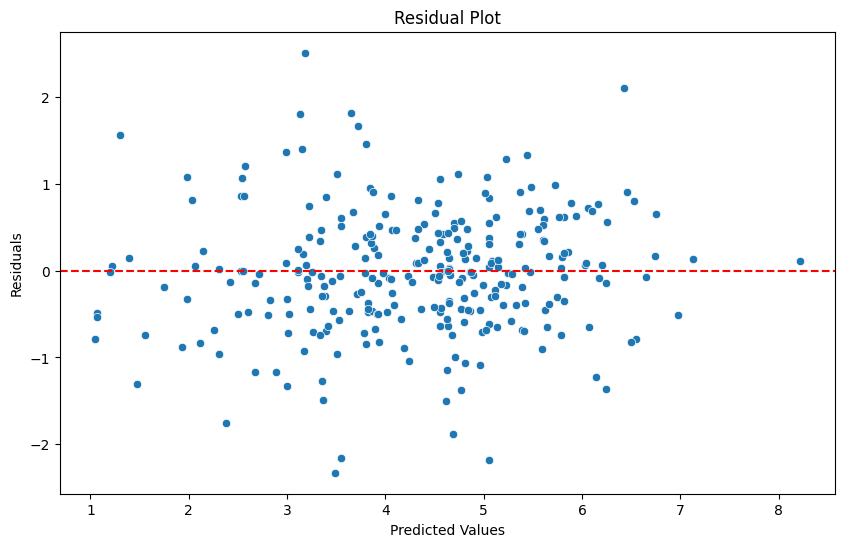

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

dari plot diatas, kita bisa lihat bahwa titik-titik yang tersebar tidak merata menandakan bahwa asumsi modelnya linear memenuhi. Lalu, variasi residual juga terlihat lumayan merata pada rentang nilai prediksi itu berarti menunjukkan homoskedastisitas (variansi residual konsisten). Dari plot juga tidak terlihat pola seperti lengkungan, naik atau turun yang berarti hubungan antara variabel prediktor dengan target sudah terwakili dengan baik oleh model.

## Membuat Q-Q Plot

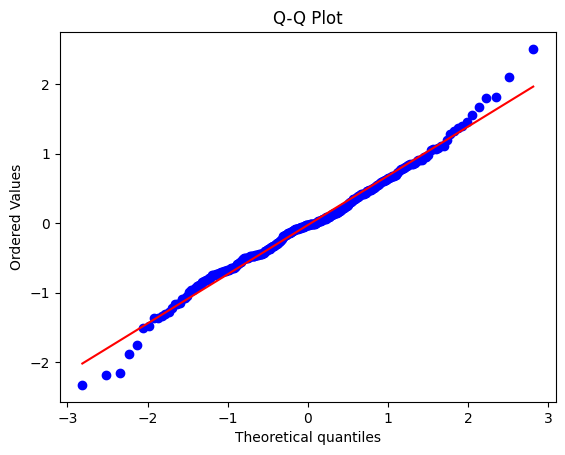

In [ ]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

berdasarkan q-q plot tersebut, terlihat bahwa titik-titik data mendekati garis diagonal merah yang berarti residual memiliki distribusi mendekati normal.

## Mengembalikkan hasil prediksi ke nilai dalam skala asli

In [ ]:
y_pred1 = np.expm1(y_pred)
y_test1 = np.expm1(y_test)

## Membuat Plot distribusi hasil prediksi vs aktual

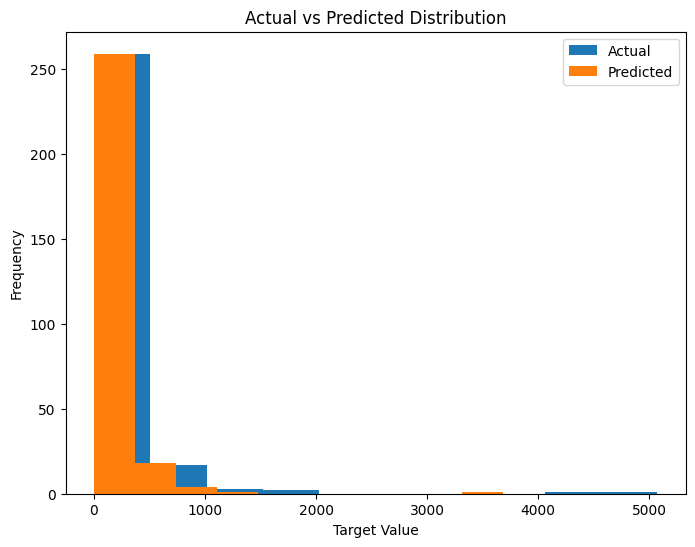

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_test1, bins=10, alpha=1, label='Actual')
plt.hist(y_pred1, bins=10, alpha=1, label='Predicted')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()

Pada nilai aktual (biru) memiliki frekuensi yang tinggi pada nilai target yang sangat kecil, sedangkan untuk prediksi (orange) cukup sama dengan nilai aktual (biru) walaupun hanya memiliki sedikit perbedaan. Ini berarti menunjukkan bahwa model dapat menangkap pola distribusi target secara umum, namun terdapat deviasi yang mungkin signifikan pada nilai tertentu, khususnya pada area dengan frekuensi rendah atau pada rentang nilai target yang lebih besar.

## SHAP (SHapley Additive exPlanations)

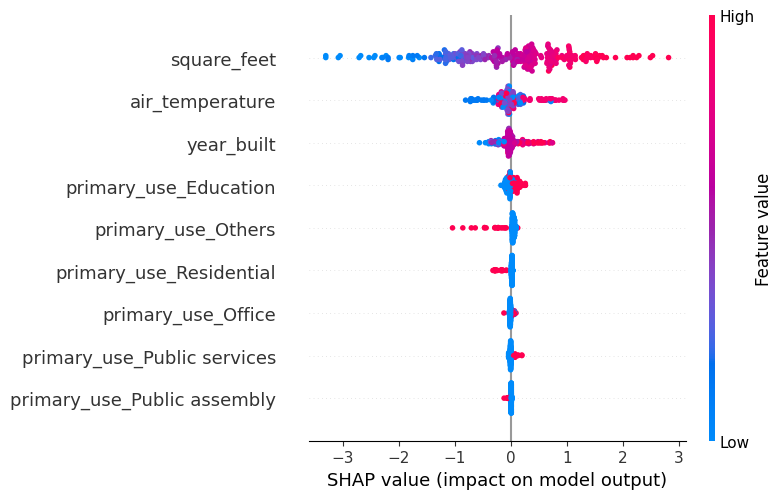

In [ ]:
explainer = shap.Explainer(bst, x_train)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)

Gambar tersebut adalah SHAP summary plot, sebuah visualisasi yang digunakan untuk menjelaskan bagaimana fitur-fitur dalam sebuah model memengaruhi prediksi.

Berikut penjelasannya secara rinci dan sederhana:
Komponen dalam Gambar:


*   Sumbu Y: Menampilkan daftar fitur yang digunakan dalam model, seperti square_feet, air_temperature, age, dan kategori primary_use.
Fitur diurutkan berdasarkan tingkat pengaruhnya pada prediksi (fitur dengan pengaruh terbesar berada di atas).
*   Sumbu X: Menunjukkan nilai SHAP (SHapley Additive exPlanations), yang mengukur sejauh mana sebuah fitur memengaruhi output model.


*   Nilai positif (ke kanan) menunjukkan bahwa fitur tersebut meningkatkan prediksi model.
*   Nilai negatif (ke kiri) menunjukkan bahwa fitur tersebut menurunkan prediksi model.



Titik-Titik Berwarna:

Setiap titik mewakili satu pengamatan (data).
Warna titik menunjukkan nilai dari fitur tersebut:
*   Merah: Nilai fitur tinggi.
*   Biru: Nilai fitur rendah.



Legenda Warna:

Menjelaskan gradien warna dari rendah (biru) ke tinggi (merah), yang membantu memahami bagaimana nilai setiap fitur memengaruhi model.

Penjelasan Fitur-Fitur:


*   square_feet (luas bangunan): Titik merah (nilai tinggi) memiliki dampak positif (meningkatkan prediksi) dengan nilai SHAP yang besar ke arah kanan.
Sebaliknya, titik biru (nilai rendah) berdampak negatif pada prediksi.
Artinya, semakin besar luas bangunan, semakin besar dampaknya dalam meningkatkan prediksi model.
*   air_temperature (suhu udara): Titik merah (suhu tinggi) lebih sering meningkatkan prediksi, sedangkan suhu rendah (biru) cenderung mengurangi nilai prediksi.
Ini masuk akal jika model memprediksi sesuatu yang sensitif terhadap suhu, misalnya konsumsi energi.
*   age (usia bangunan): Titik biru (bangunan baru) memiliki pengaruh negatif, sedangkan titik merah (bangunan lama) lebih sering memiliki pengaruh positif.
*   Kategori primary_use: Kategori ini bersifat biner (1 jika benar, 0 jika salah).


Contoh:

primary_use_Residential (penggunaan untuk perumahan):
Titik merah menunjukkan bahwa jika sebuah bangunan termasuk kategori ini, prediksi cenderung meningkat.
Titik biru menunjukkan efek sebaliknya.

Kesimpulan:

Gambar ini membantu kita memahami fitur mana yang paling memengaruhi model:

square_feet adalah fitur paling berpengaruh, diikuti oleh air_temperature.
Nilai tinggi dan rendah dari fitur dapat berdampak berbeda (positif atau negatif) pada prediksi model.
Informasi ini sangat berguna untuk menganalisis bagaimana model membuat keputusan dan memastikan bahwa hasil prediksi dapat dijelaskan dengan baik.